In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Load test data and predictions

In [2]:
test = pd.read_pickle('../data/train_dev_test/test.pkl')

In [3]:
y_pred = pd.read_pickle('../data/output/predictions.pkl')

In [4]:
flatten = lambda lst: list(chain(*lst))

df = pd.concat([test.reset_index(), pd.Series(flatten(y_pred), name='predictions')], axis=1)

# Classification report

In [5]:
print(classification_report(df.labels, df.predictions, digits=3))

              precision    recall  f1-score   support

           C      0.998     0.999     0.998    104937
           D      0.860     0.824     0.842       142
           E      0.872     0.776     0.821       624
           I      0.817     0.802     0.809       111
           N      0.785     0.593     0.675        86

    accuracy                          0.997    105900
   macro avg      0.866     0.799     0.829    105900
weighted avg      0.997     0.997     0.997    105900



# Confusion matrix

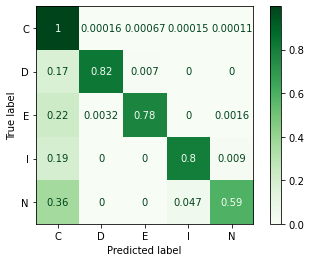

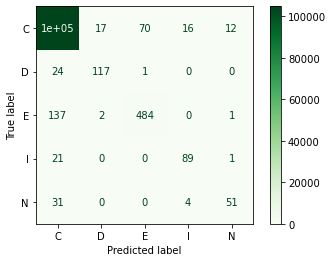

In [6]:
labels = ['C', 'D', 'E', 'I', 'N']

cm_norm = confusion_matrix(df.labels, df.predictions, labels=labels, normalize='true')
cm_norm_display = ConfusionMatrixDisplay(cm_norm, display_labels=labels).plot(cmap='Greens')

cm = confusion_matrix(df.labels, df.predictions, labels=labels)
cm_display = ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Greens')

# cm_norm_display.figure_.savefig('../data/output/crf_cm_norm.png')
# cm_display.figure_.savefig('../data/output/crf_cm.png')

# State features

In [7]:
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print(f"{weight}, {label}, {attr}")

# load model
with open('../model/crf.pkl','rb') as f:
    crf = pickle.load(f)

print("Top positive:")
print_state_features(Counter(crf.state_features_).most_common(10))

print("\nTop negative:")
print_state_features(Counter(crf.state_features_).most_common()[-10:])

Top positive:
4.786929, N, stem:onc
4.316556, D, stem:suppos
3.740931, E, stem:worri
3.739321, E, prefix_4:seem
3.530235, E, prefix_5:imply
3.506318, D, prefix_4:fore
3.458567, E, suffix_5:bably
3.381728, C, lemma_-1:probabl
3.344847, I, stem:whether
3.207101, I, lemma_1:verifi

Top negative:
-2.458727, C, stem:worri
-2.474128, C, lemma_2:open
-2.542099, C, lemma_-1:remain
-2.573519, C, prefix_3:won
-2.693637, C, lemma_1:exclud
-2.730529, E, lemma_1:like
-3.060865, C, stem:presum
-3.102576, C, prefix_5:presu
-3.12438, C, stem:rumor
-4.038436, C, lemma_1:ascertain


# Binary classification

The 4 uncertainty classes are lumped into one "uncertain" class.

In [26]:
def binarize(s):
    return s.str.replace('[EDIN]', 'U', regex=True)

df = df.assign(
    labels_bin = lambda df: binarize(df.labels),
    preds_bin = lambda df: binarize(df.predictions),
)

In [27]:
print(classification_report(df.labels_bin, df.preds_bin, digits=3))

              precision    recall  f1-score   support

           C      0.998     0.999     0.998    104937
           U      0.867     0.779     0.821       963

    accuracy                          0.997    105900
   macro avg      0.933     0.889     0.910    105900
weighted avg      0.997     0.997     0.997    105900

